![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

# Initialization with traffic lights
INITIALIZE can be conditioned on traffic light state (as can DRIVE), if the states are passed to the API correctly. This notebook is a demonstration of the capabilities of both models to be conditioned on traffic light state.


In [3]:
# Some stuff to get us going:
!pip install invertedai
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2 
import invertedai as iai
clear_output()

In [4]:
#API key:
iai.add_apikey("")

## Setup

We begin by setting up the simulation

In [5]:
# pick a location (4 way, signalized intgersection)
location = "iai:drake_street_and_pacific_blvd"
simulation_length = 30 # simulation length

## Preview map location

We can preview the map, and look at the traffic light locations to understand which of the lights control which road

(None, <matplotlib.image.AxesImage at 0x7f0ecbafe460>)

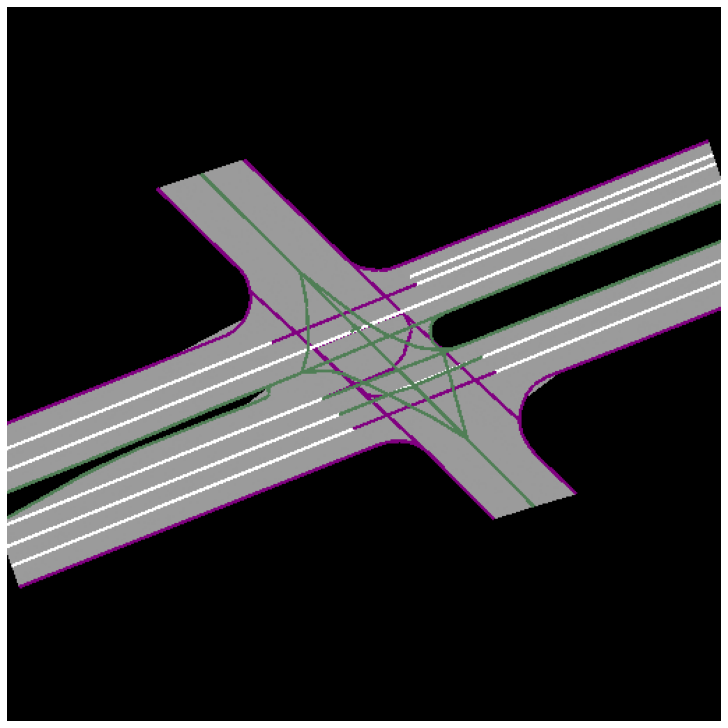

In [7]:
rendered_map = iai.location_info(location=location).birdview_image.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 10))
ax.set_axis_off(), ax.imshow(rendered_map)

In [8]:
location_info = iai.location_info(location=location)
for actor in location_info.static_actors:
    print(actor)

StaticMapActor(actor_id=3011, agent_type='traffic-light', center=Point(x=0.883, y=-15.8905), orientation=0.7876, length=0.3421, width=3.7417, dependant=None)
StaticMapActor(actor_id=3012, agent_type='traffic-light', center=Point(x=-1.682, y=-13.3246), orientation=0.7876, length=0.3423, width=3.3199, dependant=None)
StaticMapActor(actor_id=3013, agent_type='traffic-light', center=Point(x=-4.3522, y=-10.7222), orientation=0.7876, length=0.3419, width=3.8255, dependant=None)
StaticMapActor(actor_id=3014, agent_type='traffic-light', center=Point(x=-7.697, y=-7.3018), orientation=0.7772, length=0.3421, width=5.5475, dependant=None)
StaticMapActor(actor_id=3015, agent_type='traffic-light', center=Point(x=23.2852, y=-15.506), orientation=1.9221, length=0.2903, width=8.218, dependant=None)
StaticMapActor(actor_id=3016, agent_type='traffic-light', center=Point(x=13.688, y=6.3305), orientation=-2.3732, length=0.3171, width=3.2149, dependant=None)
StaticMapActor(actor_id=3017, agent_type='traffic

## Initializing on a controlled intersection

We are now in a position to initialize the simulation, with the above traffic light information, all we need to do is set the traffic lights appropriately. There are two main directions, and a left turn light in one direction. Our initial scenario will be a red light for the main road, and a green light for both side streets. The traffic light is passed as a dictionary.

In [10]:
main_road_light_state = 'red'
left_turn_light = 'red'
side_road_light_state = 'green'
light_states = [main_road_light_state, main_road_light_state, main_road_light_state, 
                left_turn_light,
                side_road_light_state,
                main_road_light_state, main_road_light_state, main_road_light_state,
                side_road_light_state]
traffic_light = {actor.actor_id : light for actor, light in zip(location_info.static_actors, light_states)}

Now we initialize and plot:

(None, <matplotlib.image.AxesImage at 0x7f0eb62fcf40>)

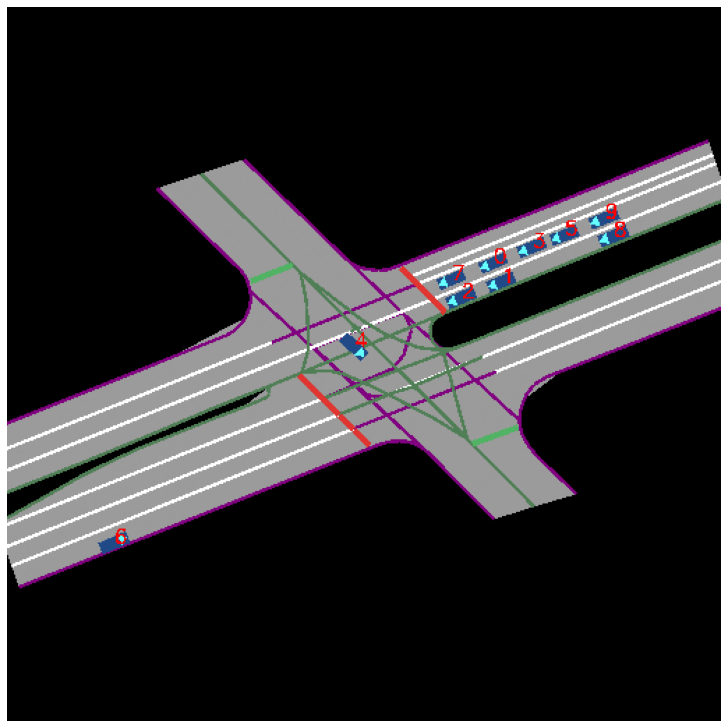

In [11]:
initial_conditions = iai.api.initialize(location, 
                            agent_attributes = None, 
                            states_history = None, 
                            traffic_light_state_history = [traffic_light],
                            get_birdview = True, 
                            get_infractions = False, 
                            agent_count = 10, 
                            random_seed = 0)

rendered_map = initial_conditions.birdview.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 10))
ax.set_axis_off(), ax.imshow(rendered_map)

And then we can run drive, conditioned on the traffic light state. In this current simulation, the traffic light does not change over the simulated time.

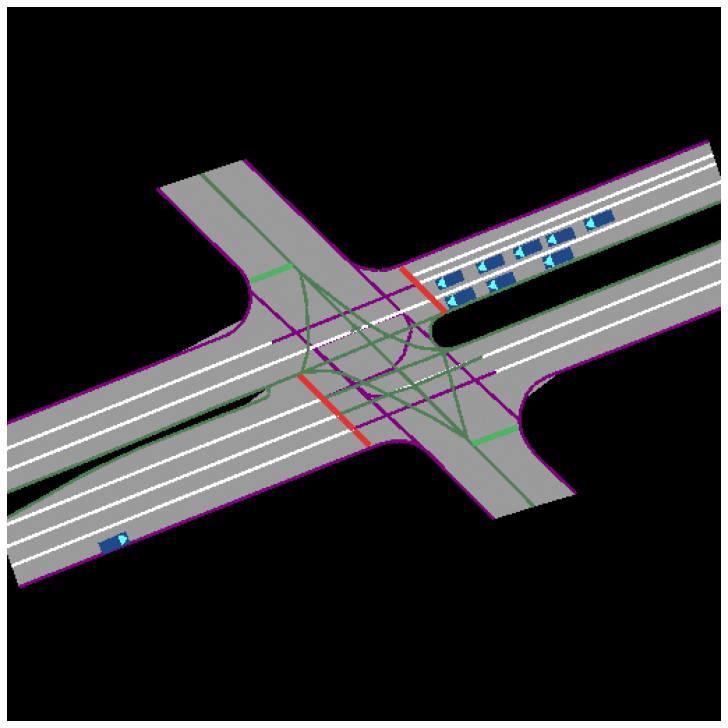

In [13]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 10))
gif_name = 'iai-drive-side-road-green.gif'
ax.set_axis_off()
agent_attributes = initial_conditions.agent_attributes
updated_state = initial_conditions
frames = []
for i in range(50):
    updated_state = iai.drive(
        agent_attributes=agent_attributes,
        agent_states=updated_state.agent_states,
        recurrent_states=updated_state.recurrent_states,
        traffic_lights_states=traffic_light,
        get_birdview=True,
        location=location,
        get_infractions=True,
    )

    image = updated_state.birdview.decode()
    frames.append(image)
    ax.imshow(frames[-1])
    display(plt.gcf())
    clear_output(wait=True)      
imageio.mimsave(gif_name, np.array(frames), format="GIF-PIL")

And an assembled gif:

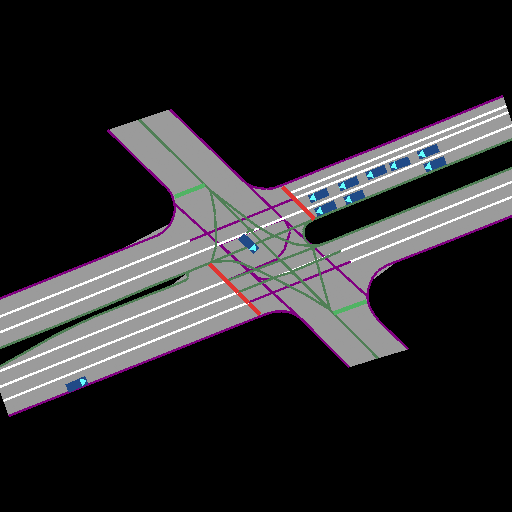

In [15]:
Image(gif_name)

## Alternate traffic light
To demonstrate how the model reacts to different traffic light states, we now show what happens when we initialize with an alternate traffic light state: the main road now has the green light while the side roads are red.

In [16]:
main_road_light_state = 'green'
left_turn_light = 'green'
side_road_light_state = 'red'
light_states = [main_road_light_state, main_road_light_state, main_road_light_state, 
                left_turn_light,
                side_road_light_state,
                main_road_light_state, main_road_light_state, main_road_light_state,
                side_road_light_state]
traffic_light = {actor.actor_id : light for actor, light in zip(location_info.static_actors, light_states)}

We again initialize

(None, <matplotlib.image.AxesImage at 0x7f0eb4fbbb80>)

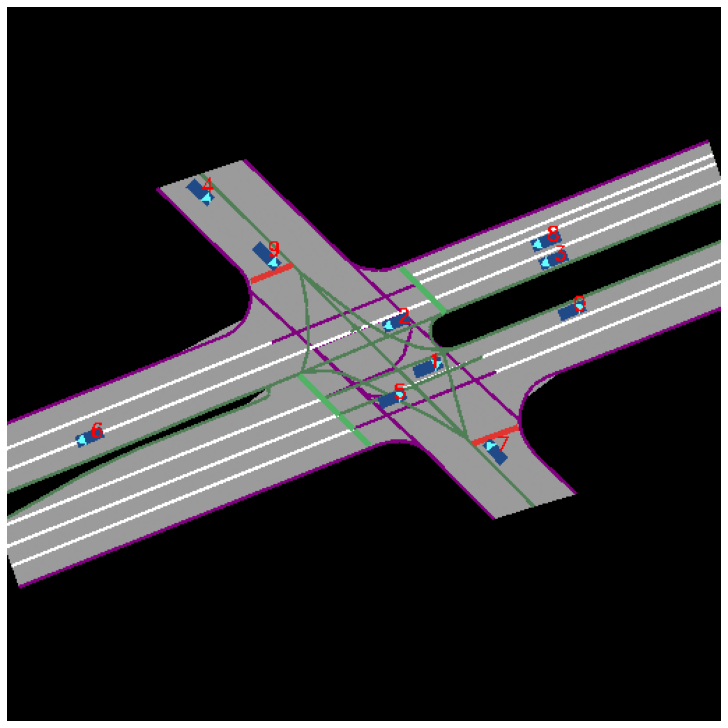

In [17]:
initial_conditions = iai.api.initialize(location, 
                            agent_attributes = None, 
                            states_history = None, 
                            traffic_light_state_history = [traffic_light],
                            get_birdview = True, 
                            get_infractions = False, 
                            agent_count = 10, 
                            random_seed = 0)

rendered_map = initial_conditions.birdview.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 10))
ax.set_axis_off(), ax.imshow(rendered_map)

And simulate using DRIVE:

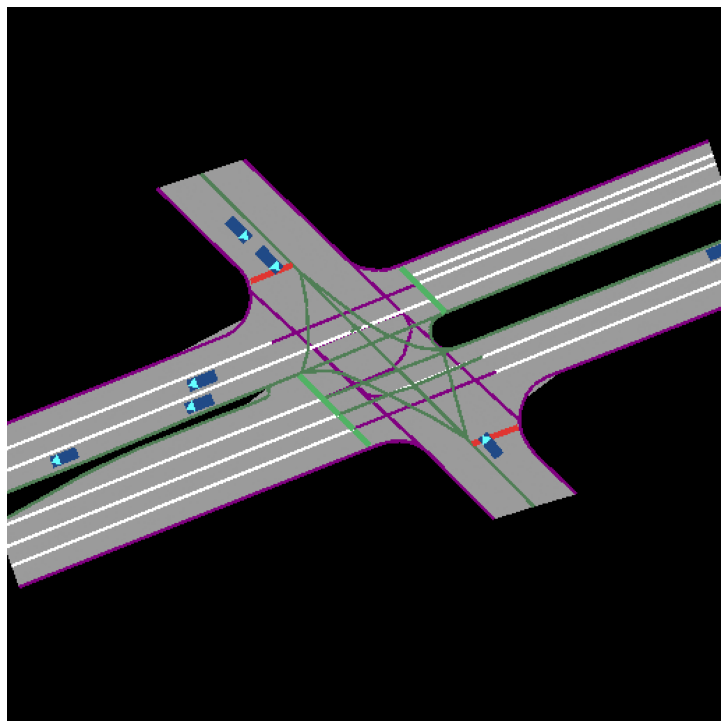

In [19]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 10))
gif_name = 'iai-drive-main-road-green.gif'
ax.set_axis_off()
agent_attributes = initial_conditions.agent_attributes
updated_state = initial_conditions
frames = []
for i in range(50):
    updated_state = iai.drive(
        agent_attributes=agent_attributes,
        agent_states=updated_state.agent_states,
        recurrent_states=updated_state.recurrent_states,
        traffic_lights_states=traffic_light,
        get_birdview=True,
        location=location,
        get_infractions=True,
    )

    image = updated_state.birdview.decode()
    frames.append(image)
    ax.imshow(frames[-1])
    display(plt.gcf())
    clear_output(wait=True)      
imageio.mimsave(gif_name, np.array(frames), format="GIF-PIL")

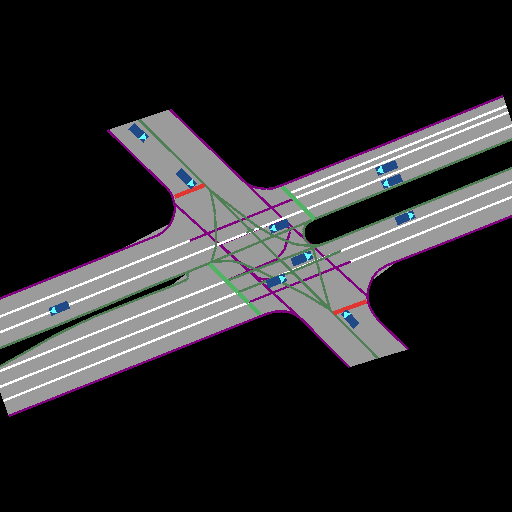

In [20]:
Image(gif_name)